In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
np.random.seed(0)
plt.style.use("ggplot")

import tensorflow as tf
print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.7.0


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/ner_dataset.csv",encoding='latin1')
df.head(30)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O
5,NaN,through,IN,O
6,NaN,London,NNP,B-geo
7,NaN,to,TO,O
8,NaN,protest,VB,O
9,NaN,the,DT,O


In [ ]:
df.isnull().sum()

Sentence #    1000616
Word                0
POS                 0
Tag                 0
dtype: int64

In [ ]:
df=df.fillna(method='ffill')
df.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O


In [ ]:
df.isnull().sum()

Sentence #    0
Word          0
POS           0
Tag           0
dtype: int64

In [ ]:
df['Tag'].value_counts()

O        887908
B-geo     37644
B-tim     20333
B-org     20143
I-per     17251
B-per     16990
I-org     16784
B-gpe     15870
I-geo      7414
I-tim      6528
B-art       402
B-eve       308
I-art       297
I-eve       253
B-nat       201
I-gpe       198
I-nat        51
Name: Tag, dtype: int64

In [ ]:
n_tags=df['Tag'].nunique()
n_tags

17

In [ ]:
n_words=df['Word'].nunique()
n_words

35178

In [ ]:
words=list(set(df['Word']))

In [ ]:
# words

In [ ]:
n_words=len(words)

In [ ]:
tags=list(set(df['Tag']))

In [ ]:
tags

['I-gpe',
 'I-org',
 'I-per',
 'B-geo',
 'B-gpe',
 'B-org',
 'I-eve',
 'B-per',
 'B-nat',
 'I-geo',
 'I-tim',
 'B-art',
 'O',
 'B-tim',
 'B-eve',
 'I-nat',
 'I-art']

In [ ]:
n_tags=len(tags)

In [ ]:
class GetSentence(object):
    def __init__(self, data):
        self.n_sentence=1
        self.data=data
        self.empty = False
        function=lambda d:[(w, p, t) for w, p, t in zip(d["Word"].values.tolist(),
                                                        d["POS"].values.tolist(),
                                                        d["Tag"].values.tolist())]

        self.group_sent = self.data.groupby("Sentence #").apply(function)
        self.all_sentences = [d for d in self.group_sent]

In [ ]:
get=GetSentence(df)
sentences=get.all_sentences

In [ ]:
sentences[0]

[('Thousands', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('demonstrators', 'NNS', 'O'),
 ('have', 'VBP', 'O'),
 ('marched', 'VBN', 'O'),
 ('through', 'IN', 'O'),
 ('London', 'NNP', 'B-geo'),
 ('to', 'TO', 'O'),
 ('protest', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('war', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('Iraq', 'NNP', 'B-geo'),
 ('and', 'CC', 'O'),
 ('demand', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('withdrawal', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('British', 'JJ', 'B-gpe'),
 ('troops', 'NNS', 'O'),
 ('from', 'IN', 'O'),
 ('that', 'DT', 'O'),
 ('country', 'NN', 'O'),
 ('.', '.', 'O')]

In [ ]:
sentences[6]

[('He', 'PRP', 'O'),
 ('said', 'VBD', 'O'),
 ('last', 'JJ', 'O'),
 ('week', 'NN', 'O'),
 ("'s", 'POS', 'O'),
 ('tsunami', 'NN', 'O'),
 ('and', 'CC', 'O'),
 ('the', 'DT', 'O'),
 ('massive', 'JJ', 'O'),
 ('underwater', 'NN', 'O'),
 ('earthquake', 'NN', 'O'),
 ('that', 'WDT', 'O'),
 ('triggered', 'VBD', 'O'),
 ('it', 'PRP', 'O'),
 ('has', 'VBZ', 'O'),
 ('affected', 'VBN', 'O'),
 ('millions', 'NNS', 'O'),
 ('in', 'IN', 'O'),
 ('Asia', 'NNP', 'B-geo'),
 ('and', 'CC', 'O'),
 ('Africa', 'NNP', 'B-geo'),
 ('.', '.', 'O')]

In [ ]:
len(sentences)

47959

In [ ]:
maxl = max([len(s) for s in sentences])
print ('Maximum sequence length in the list of sentences:', maxl)

Maximum sequence length in the list of sentences: 104


In [ ]:
w_index={w:i for i,w in enumerate(words)}
t_index={t:j for j,t in enumerate(tags)}

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [ ]:
maxl

104

In [ ]:
X=[[w_index[w[0]]for w in s]for s in sentences]

In [ ]:
X=pad_sequences(maxlen=maxl,padding='post',sequences=X)

In [ ]:
X

array([[34954, 26834, 32980, ...,     0,     0,     0],
       [32183, 25293, 10679, ...,     0,     0,     0],
       [11494, 25367, 16046, ...,     0,     0,     0],
       ...,
       [11572, 29158, 11898, ...,     0,     0,     0],
       [ 2600, 18344,  8241, ...,     0,     0,     0],
       [24281, 30815, 20539, ...,     0,     0,     0]], dtype=int32)

In [ ]:
Y = [[t_index[w[2]] for w in s] for s in sentences]

In [ ]:
Y=pad_sequences(maxlen=maxl,padding='post',sequences=Y)

In [ ]:
Y[1]

array([ 4, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 12,
       12, 12,  5, 12, 12, 12, 12, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0], dtype=int32)

In [ ]:
# Y

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=42)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train =to_categorical(y_train)

In [ ]:
print(x_train.shape, y_train.shape)

(43163, 104) (43163, 104, 17)


In [ ]:
print(x_test.shape, y_test.shape)

(4796, 104) (4796, 104)


In [ ]:
y_test =to_categorical(y_test)

In [ ]:
print(x_test.shape, y_test.shape)

(4796, 104) (4796, 104, 17)


In [ ]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional

In [ ]:
input=Input(shape=(104))
model=Embedding(input_dim=n_words,output_dim=104,input_length=140)(input)
model=SpatialDropout1D(0.1)(model)
model=Bidirectional(LSTM(units=150,return_sequences=True, recurrent_dropout=0.1))(model)
output = TimeDistributed(Dense(n_tags, activation="softmax"))(model)

In [ ]:
model=Model(input,output)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 104)]             0         
                                                                 
 embedding (Embedding)       (None, 104, 104)          3658512   
                                                                 
 spatial_dropout1d (SpatialD  (None, 104, 104)         0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 104, 300)         306000    
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 104, 17)          5117      
 ibuted)                                                         
                                                             

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
!pip install livelossplot

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot.tf_keras import PlotLossesCallback

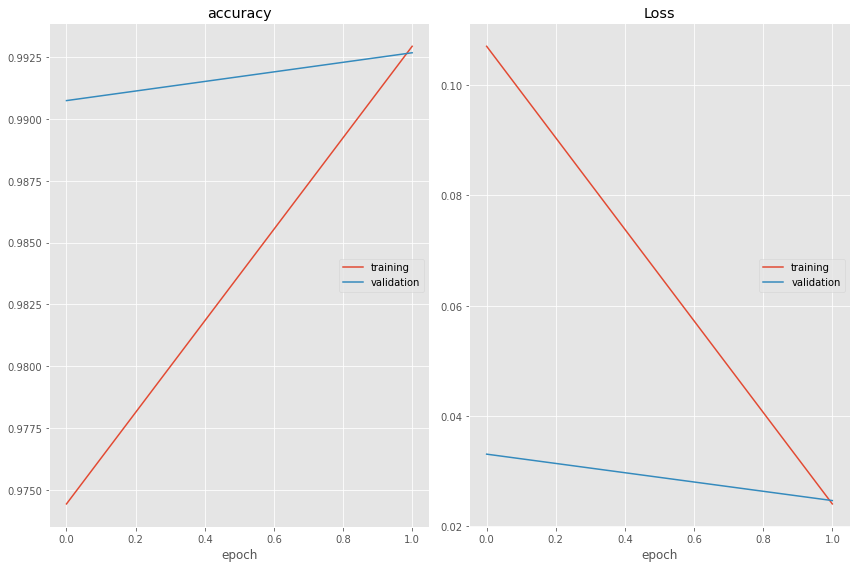

accuracy
	training         	 (min:    0.974, max:    0.993, cur:    0.993)
	validation       	 (min:    0.991, max:    0.993, cur:    0.993)
Loss
	training         	 (min:    0.024, max:    0.107, cur:    0.024)
	validation       	 (min:    0.025, max:    0.033, cur:    0.025)
1080/1080 [==============================] - 797s 738ms/step - loss: 0.0241 - accuracy: 0.9929 - val_loss: 0.0247 - val_accuracy: 0.9927


In [ ]:
early_stop= EarlyStopping(monitor='val_accuracy',patience=1,verbose=0,mode='max',restore_best_weights=False)
callbacks=[PlotLossesCallback(),early_stop]

history=model.fit(x_train,np.array(y_train),validation_split=0.2,batch_size=32,epochs=2,verbose=1,callbacks=callbacks)

In [ ]:
model.evaluate(x_test,np.array(y_test))

150/150 [==============================] - 14s 95ms/step - loss: 0.0247 - accuracy: 0.9926


[0.024748774245381355, 0.9926220774650574]

In [ ]:
test_pred = model.predict(x_test, verbose=1)

150/150 [==============================] - 15s 93ms/step


In [ ]:
i_x = {i: w for w, i in t_index.items()}

def pred2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p)
            out_i.append(i_x[p_i].replace("PAD", "O"))
        out.append(out_i)
    return out

pred_labels = pred2label(test_pred)
test_labels = pred2label(y_test)

In [ ]:
!pip install seqeval

     |████████████████████████████████| 43 kB 1.1 MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16180 sha256=2f07daa008525997eeb1db2aa0eac162f30c4f06a61bbe0f2e0289c71f27ff19
  Stored in directory: /root/.cache/pip/wheels/05/96/ee/7cac4e74f3b19e3158dce26a20a1c86b3533c43ec72a549fd7
Successfully built seqeval


In [ ]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
print(classification_report(test_labels, pred_labels))

/usr/local/lib/python3.7/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         art       0.00      0.00      0.00        46
         eve       0.00      0.00      0.00        35
         geo       0.84      0.86      0.85      3797
         gpe       0.99      0.98      0.98      6386
         nat       0.00      0.00      0.00        20
         org       0.62      0.66      0.64      2055
         per       0.71      0.71      0.71      1668
         tim       0.87      0.81      0.84      2033

   micro avg       0.86      0.85      0.86     16040
   macro avg       0.50      0.50      0.50     16040
weighted avg       0.86      0.85      0.86     16040



In [ ]:
i = np.random.randint(0,x_test.shape[0])
p = model.predict(np.array([x_test[i]]))
p = np.argmax(p, axis=-1)

y_true=np.argmax(np.array(y_test),axis=-1)[i]
print("{:15} ({:5}): {}".format("Word", "True", "Predicted by our Model"))

print("--"*20)

for w,true,pred in zip(x_test[i],y_true,p[0]):
    print("{:15}{}\t {}".format(words[w-1],tags[true],tags[pred]))

Word            (True ): Predicted by our Model
----------------------------------------
technology-intensiveO	 O
linguistic     O	 O
Zapatero       O	 O
heartless      O	 O
wool           O	 O
involve        O	 O
Mazar-i-Sharif O	 O
Minority       O	 O
ensures        O	 O
comparative    O	 O
wisdom         O	 O
Resistance     I-gpe	 I-gpe
Resistance     I-gpe	 I-gpe
Resistance     I-gpe	 I-gpe
Resistance     I-gpe	 I-gpe
Resistance     I-gpe	 I-gpe
Resistance     I-gpe	 I-gpe
Resistance     I-gpe	 I-gpe
Resistance     I-gpe	 I-gpe
Resistance     I-gpe	 I-gpe
Resistance     I-gpe	 I-gpe
Resistance     I-gpe	 I-gpe
Resistance     I-gpe	 I-gpe
Resistance     I-gpe	 I-gpe
Resistance     I-gpe	 I-gpe
Resistance     I-gpe	 I-gpe
Resistance     I-gpe	 I-gpe
Resistance     I-gpe	 I-gpe
Resistance     I-gpe	 I-gpe
Resistance     I-gpe	 I-gpe
Resistance     I-gpe	 I-gpe
Resistance     I-gpe	 I-gpe
Resistance     I-gpe	 I-gpe
Resistance     I-gpe	 I-gpe
Resistance     I-gpe	 I-gpe
Resistance    

In [ ]:
p[0]

array([12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0])

In [ ]:
i = np.random.randint(0,x_test.shape[0])
p = model.predict(np.array([x_test[i]]))
p = np.argmax(p, axis=-1)

y_true=np.argmax(np.array(y_test),axis=-1)[i]
print("{:15} ({:5}): {}".format("Word", "True", "Predicted by our Model"))

print("--"*10)

for w,true,pred in zip(x_test[i],y_true,p[0]):
    print("{:15}{}\t {}".format(words[w-1],tags[true],tags[pred]))

Word            (True ): Predicted by our Model
--------------------
direct         O	 O
collaboration  B-org	 B-org
housekeeping   I-org	 I-org
condemning     I-org	 I-org
Sum-41         O	 O
depending      O	 O
05-Feb         B-per	 O
human          I-per	 I-per
depending      O	 O
linguistic     O	 O
ensures        O	 O
154            O	 O
schools        O	 O
couples        O	 O
Liege          O	 O
demolishing    O	 O
Henk           O	 O
Raccoon        B-org	 B-org
depending      I-org	 O
Center-left    I-org	 B-org
depending      O	 O
fleece         B-org	 I-org
depending      O	 O
Thailand       B-org	 I-org
depending      O	 O
lawfully       B-org	 O
depending      I-org	 O
expires        I-org	 B-org
level          I-org	 O
Iacovou        I-org	 O
wisdom         O	 O
Resistance     I-gpe	 I-gpe
Resistance     I-gpe	 I-gpe
Resistance     I-gpe	 I-gpe
Resistance     I-gpe	 I-gpe
Resistance     I-gpe	 I-gpe
Resistance     I-gpe	 I-gpe
Resistance     I-gpe	 I-gpe
Resistance     I-gp

In [ ]:
report=classification_report(test_labels, pred_labels,output_dict=True)
df = pd.DataFrame(report)
df
df.to_csv('proposed.csv')

/usr/local/lib/python3.7/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


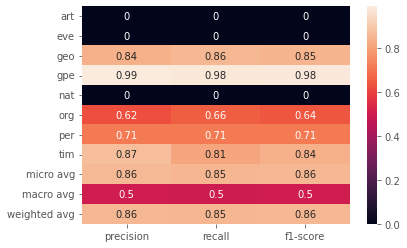

In [ ]:
import seaborn as sns
clf_report=classification_report(test_labels, pred_labels,output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

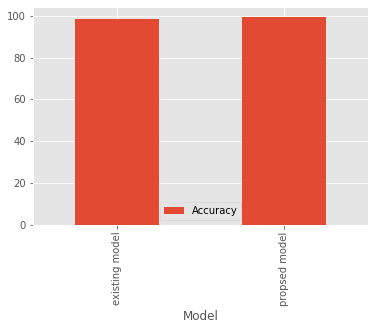

In [ ]:
data = [['existing model', 98.57], ['propsed model', 99.28]]
df = pd.DataFrame(data, columns = ['Model', 'Accuracy'])
df.plot(x='Model',y='Accuracy',kind='bar')